In [ ]:
import lightgbm as lgb
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

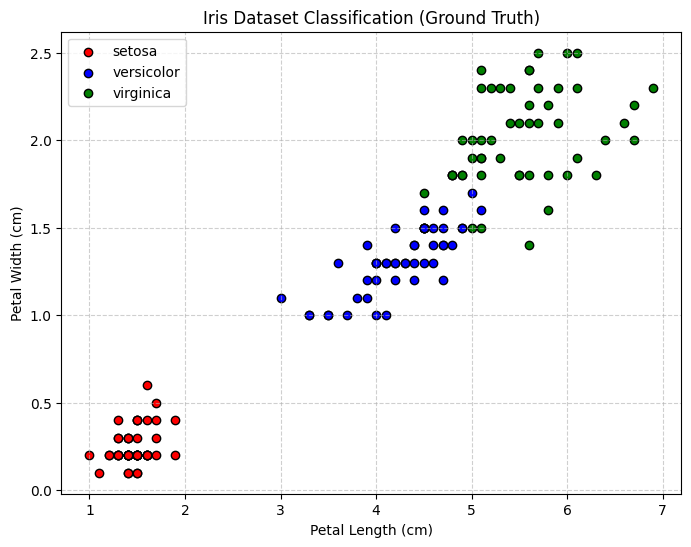

In [ ]:
# データの読み込み
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# グラフの設定
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
for target in range(len(iris.target_names)):
    subset = df[df['target'] == target]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'],
                c=colors[target], label=iris.target_names[target], edgecolors='k')

plt.title('Iris Dataset Classification (Ground Truth)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:

# 1. データの準備 (Step1)
X, y = iris.data, iris.target

# 5-fold CVの設定
kf = KFold(n_splits=5, shuffle=True, random_state=42)
#kf = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []
train_counts = []
valid_counts = []

In [ ]:
print(f"--- 交差検証(5-fold CV) 実行中 ---")
print(f"{'Round':<10} | {'検証データの正解':<20} | {'AIの予測結果':<20} | {'正解率'}")
print("-" * 75)
total_count = X.shape[0] # データの総数を取得

# 2. 学習と評価のループ
for i, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # 件数（数値）を保存
    train_counts.append(len(X_train))
    valid_counts.append(len(X_val))

    # モデル構築
    model = lgb.LGBMClassifier(logging_level='silent', random_state=42)

    # 学習 (Step2)
    model.fit(X_train, y_train)

    # 推論 (Step4のシミュレーション)
    y_pred = model.predict(X_val)

    # 評価 (Step3)
    acc = accuracy_score(y_val, y_pred)
    scores.append(acc)

    # 各Foldの結果をプリント
    # データの量が多いので、先頭10個程度の予測値を表示
    print(f"Round {i+1:<4} | {str(y_val[:10]):<20} | {str(y_pred[:10]):<20} | {acc:.4f}")

--- 交差検証(5-fold CV) 実行中 ---
Round      | 検証データの正解             | AIの予測結果              | 正解率
---------------------------------------------------------------------------
[LightGBM] [Warning] Unknown parameter: logging_level
[LightGBM] [Warning] Unknown parameter: logging_level
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.073920
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# 3. 最終結果
# スコアリストをカンマ区切りで整形して表示
formatted_scores = ", ".join([f"{s:.4f}" for s in scores])

# 最終結果の表示
print("\n【最終評価まとめ】")
print(f"    データ総数: {total_count:d}")
for i, s in enumerate(scores):
    # インデックスは [i] を使用します
    print(f"         Round {i+1}: {s:.4f}   Train {i+1}: {train_counts[i]:d}件   Valid {i+1}: {valid_counts[i]:d}件")

print(f"    -----------------------------------------------------")
print(f"    最終的な平均正解率 (汎化性能): {np.mean(scores):.4f}")


【最終評価まとめ】
    データ総数: 150
         Round 1: 1.0000   Train 1: 120件   Valid 1: 30件
         Round 2: 0.9667   Train 2: 120件   Valid 2: 30件
         Round 3: 0.9333   Train 3: 120件   Valid 3: 30件
         Round 4: 0.9333   Train 4: 120件   Valid 4: 30件
         Round 5: 0.9333   Train 5: 120件   Valid 5: 30件
    -----------------------------------------------------
    最終的な平均正解率 (汎化性能): 0.9533
